<a href="https://colab.research.google.com/github/kiptootitus/tensorflow/blob/main/Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ### Image Data
  * Here we will be dealing with images of `3 Dimensions`.
  1. Color Channels.
  2. Width
  3. Height
  * Color depth can range from 1 to 255.

In [36]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras import models, layers, datasets


Load datasets here from keras



In [37]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [38]:
# shape
train_images.shape

(50000, 32, 32, 3)

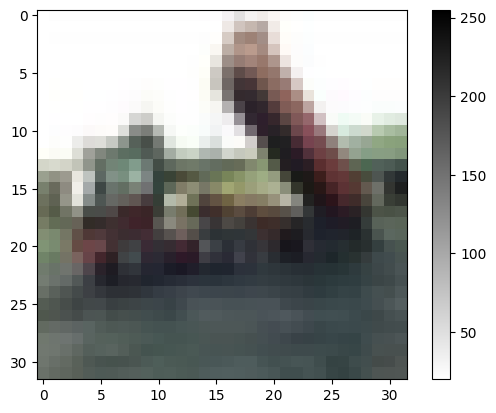

In [39]:
plt.figure()
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
# Normalization of the images
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Model Building
* We can start by initializing whicht type of the model are we going to used.
* Then, when creating our model we are going to use this addition method `model.add(layers.__) `to stack layers together to form a model from input shape, hidden layers to output

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))



In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

#Adding Dense layers
* By using `model.add()` we can add the dense layers to our model.

In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10))

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

# Model compilation


In [45]:
model.compile(optimizer='adam',
          loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics = ['accuracy'])

# Model training


In [46]:
history = model.fit(train_images, train_labels, epochs= 2,
                    validation_data = (test_images, test_labels))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3355 - loss: 1.8000 - val_accuracy: 0.5209 - val_loss: 1.3490
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5413 - loss: 1.2818 - val_accuracy: 0.5903 - val_loss: 1.1597


In [47]:
(test_acc, test_loss) = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc * 100, '%')

313/313 - 1s - 2ms/step - accuracy: 0.5903 - loss: 1.1597
115.96840620040894 %


In [48]:
pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
type(pred)


numpy.ndarray

ship


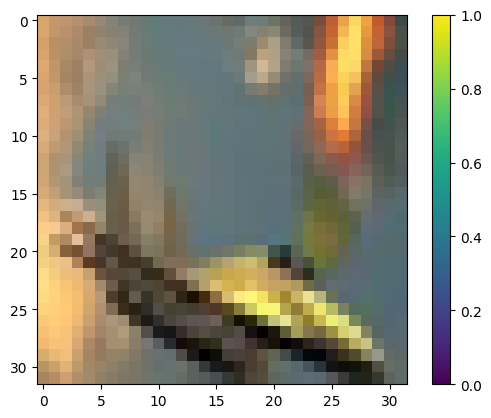

In [50]:
print(class_names[np.argmax(pred[125])])
plt.figure()
plt.imshow(test_images[125])
plt.colorbar()
plt.grid(False)
plt.show()

## Data augementation

<function matplotlib.pyplot.show(close=None, block=None)>

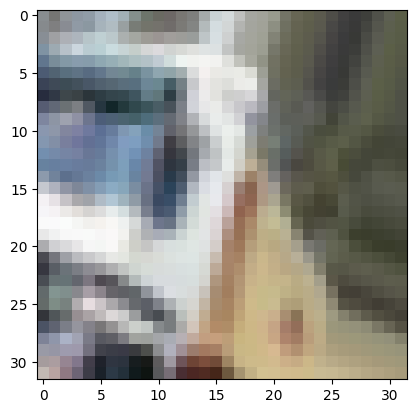

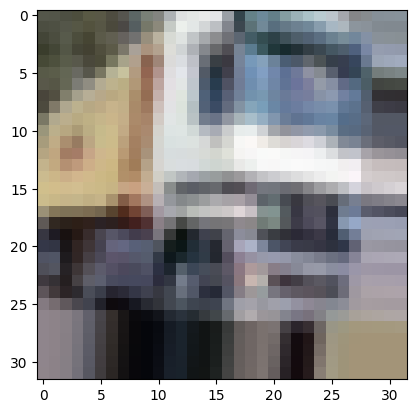

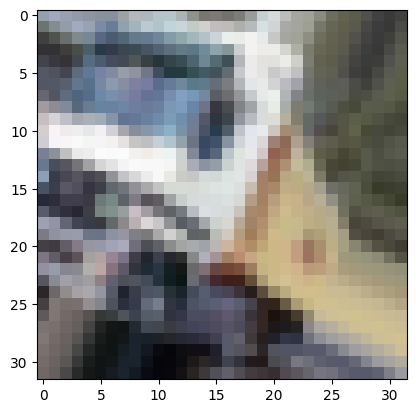

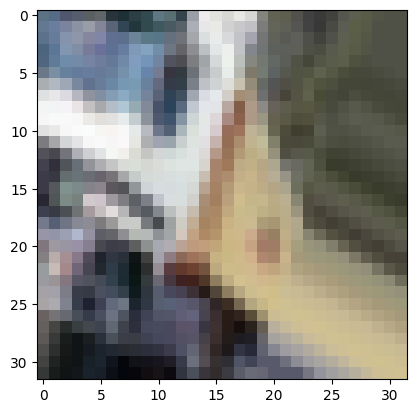

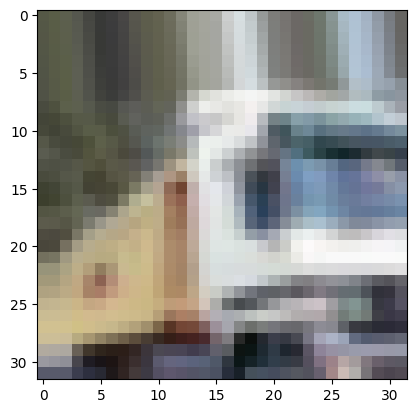

In [59]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen  = ImageDataGenerator(
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2,
  horizontal_flip = True,
  fill_mode = 'nearest'
)

test_img = train_images[1]
img = image.img_to_array(test_img) # converts to array
img= img.reshape((1,)+ img.shape) # reshapes the images

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format="jpeg"):
  plt.figure(i)
  plot= plt.imshow(image.img_to_array(batch[0]))

  i += 1
  if i > 4:
      break

plt.show